<a href="https://colab.research.google.com/github/Pranav2290/Personal-Finance-Analytics-Income-Savings-Credit-Risk-Analysis/blob/main/cleaning_eda_featureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loding Data

In [1]:
# import the file
from os import read
from google.colab import files
upload = files.upload()

Saving personal_finance_dataset.csv to personal_finance_dataset.csv


In [2]:
# read the file
import pandas as pd

df = pd.read_csv('personal_finance_dataset.csv')

## 🧹 1️⃣ DATA UNDERSTANDING & CLEANING (Very Important)

In [3]:
# check size
df.shape

(32424, 20)

In [4]:
# view structure
df.head()

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,09-01-2024
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,13-02-2022
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,12-05-2022
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,02-10-2023
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,07-08-2021


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  32424 non-null  object 
 1   age                      32424 non-null  int64  
 2   gender                   32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   monthly_income_usd       32424 non-null  float64
 7   monthly_expenses_usd     32424 non-null  float64
 8   savings_usd              32424 non-null  float64
 9   has_loan                 32424 non-null  object 
 10  loan_type                12995 non-null  object 
 11  loan_amount_usd          32424 non-null  float64
 12  loan_term_months         32424 non-null  int64  
 13  monthly_emi_usd          32424 non-null  float64
 14  loan_interest_rate_pct

In [6]:
#change record_date datatype
import datetime as dt
df['record_date'] = pd.to_datetime(df['record_date'], format='%d-%m-%Y')

In [7]:
df.head()

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07


In [8]:
# statestical summary (Numeric values)
df.describe()

,age,monthly_income_usd,monthly_expenses_usd,savings_usd,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,record_date
count,32424.000000,32424.000000,32424.000000,3.242400e+04,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424
mean,43.415865,4027.863185,2419.444709,2.437520e+05,100114.735992,58.500000,3092.992339,6.616332,1.194881,575.260424,5.045431,2023-07-24 02:38:14.300518144
min,18.000000,500.000000,150.010000,6.359600e+02,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.100000,2021-07-23 00:00:00
25%,30.000000,2657.795000,1397.497500,8.629155e+04,0.000000,0.000000,0.000000,0.000000,0.000000,437.000000,2.580000,2022-07-22 00:00:00
50%,43.000000,3997.740000,2219.575000,2.017003e+05,0.000000,0.000000,0.000000,0.000000,0.000000,575.000000,5.040000,2023-07-24 00:00:00
75%,56.000000,5351.607500,3254.037500,3.589662e+05,189499.070000,60.000000,3574.567500,13.140000,0.920000,714.000000,7.510000,2024-07-22 00:00:00
max,69.000000,12404.050000,10082.710000,1.237774e+06,499954.750000,360.000000,47723.840000,30.000000,90.670000,850.000000,10.000000,2025-07-22 00:00:00
std,14.978246,1916.773353,1388.893084,1.915772e+05,152536.588635,104.865373,6478.939776,9.472964,3.761964,159.023227,2.851344,NaN


In [9]:
# what about categorical columns
df.describe(include='object')

,user_id,gender,education_level,employment_status,job_title,has_loan,loan_type,region
count,32424,32424,32424,32424,32424,32424,12995,32424
unique,32424,3,5,4,9,2,4,5
top,U32424,Male,Bachelor,Employed,Driver,No,Home,North America
freq,1,15595,13038,19410,3698,19429,3284,6581


In [10]:
# check missing values
df.isnull().sum() # if user don't have loan then loan_type is null

,0
user_id,0
age,0
gender,0
education_level,0
employment_status,0
job_title,0
monthly_income_usd,0
monthly_expenses_usd,0
savings_usd,0
has_loan,0


In [11]:
# percentage of null values
(df.isna().mean() * 100).sort_values(ascending=False)

,0
loan_type,59.921663
user_id,0.000000
gender,0.000000
age,0.000000
education_level,0.000000
employment_status,0.000000
monthly_income_usd,0.000000
job_title,0.000000
monthly_expenses_usd,0.000000
savings_usd,0.000000


In [12]:
# check duplicates
df.duplicated().sum()  #no duplicated (every recored is unique user)

np.int64(0)

In [13]:
# check columns names()
df.columns

Index(['user_id', 'age', 'gender', 'education_level', 'employment_status',
       'job_title', 'monthly_income_usd', 'monthly_expenses_usd',
       'savings_usd', 'has_loan', 'loan_type', 'loan_amount_usd',
       'loan_term_months', 'monthly_emi_usd', 'loan_interest_rate_pct',
       'debt_to_income_ratio', 'credit_score', 'savings_to_income_ratio',
       'region', 'record_date'],
      dtype='object')

In [14]:
# Validate credit score range
df[ (df['credit_score'] < 300) | (df['credit_score'] > 850)]

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date


## 🔍 2️⃣ EXPLORATORY DATA ANALYSIS (EDA)

### Demographic

In [15]:
# 1 Users by regions
df['region'].value_counts()

,count
region,
North America,6581
Asia,6551
Europe,6519
Other,6407
Africa,6366


In [16]:
# 2. Age distribution
df['age'].value_counts().sort_index()

,count
age,
18,654
19,638
20,580
21,613
22,628
23,595
24,616
25,630
26,621


In [17]:
# 3. Users by education
df['education_level'].value_counts()

,count
education_level,
Bachelor,13038
Master,9673
High School,6456
PhD,1638
Other,1619


In [18]:
# 4. Employment status counts
df['employment_status'].value_counts()

,count
employment_status,
Employed,19410
Self-employed,6580
Unemployed,3220
Student,3214


In [19]:
# 5. Top job titles
df['job_title'].value_counts().head(10)

,count
job_title,
Driver,3698
Teacher,3674
Manager,3621
Student,3609
Unemployed,3606
Accountant,3591
Salesperson,3567
Doctor,3554
Engineer,3504


### B.Income Analysis

In [20]:
# 6. Average income
df['monthly_income_usd'].mean()

np.float64(4027.8631846780163)

In [21]:
# 7. Income by region
df.groupby('region')['monthly_income_usd'].mean().sort_values(ascending=False)

,monthly_income_usd
region,
Europe,4052.205562
Asia,4027.780499
Africa,4026.341740
North America,4021.283249
Other,4011.450165


In [22]:
import numpy as np
# 8. Create income buckets
df['income_bucket'] = pd.cut(
    df['monthly_income_usd'],
    bins=[0, 2000, 5000, 10000, np.inf],
    labels=['Low','lower-Mid', 'Upper-Mid', 'High']
)

In [23]:
df.head()

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,income_bucket
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,...,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09,lower-Mid
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,...,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13,lower-Mid
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,...,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12,lower-Mid
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,...,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02,Upper-Mid
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,...,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07,Upper-Mid


In [24]:
# 9. Income bucket distribution
df['income_bucket'].value_counts()

,count
income_bucket,
lower-Mid,17337
Upper-Mid,9947
Low,5093
High,47


In [25]:
# 10 Top 10% income earners
threshhold = df['monthly_income_usd'].quantile(0.90)
df[ df['monthly_income_usd'] >= threshhold]

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,income_bucket
20,U00021,23,Male,High School,Student,Engineer,8237.77,7316.78,83622.72,Yes,...,425717.20,36,13258.10,7.58,1.61,622,0.85,Europe,2023-03-24,Upper-Mid
21,U00022,49,Female,Bachelor,Employed,Teacher,7093.07,3500.65,723648.99,Yes,...,180386.08,240,2286.50,14.33,0.32,707,8.50,Other,2023-03-14,Upper-Mid
27,U00028,40,Male,PhD,Unemployed,Doctor,7744.01,4063.81,585076.67,No,...,0.00,0,0.00,0.00,0.00,624,6.30,Other,2024-06-14,Upper-Mid
29,U00030,18,Other,PhD,Employed,Teacher,6561.08,2121.71,489775.18,Yes,...,160168.84,24,7393.94,10.04,1.13,495,6.22,Europe,2022-11-29,Upper-Mid
35,U00036,67,Female,High School,Employed,Unemployed,6715.76,5990.35,306664.24,Yes,...,119105.91,240,2948.40,29.62,0.44,431,3.81,Africa,2025-04-13,Upper-Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32386,U32387,21,Female,Master,Self-employed,Teacher,6766.68,2289.78,215021.51,Yes,...,327798.46,360,2200.70,7.09,0.33,330,2.65,Other,2022-07-13,Upper-Mid
32396,U32397,43,Female,Bachelor,Employed,Salesperson,7638.69,6404.43,183705.84,Yes,...,234473.57,180,2722.72,11.39,0.36,792,2.00,Asia,2023-03-24,Upper-Mid
32402,U32403,52,Female,Bachelor,Employed,Unemployed,6808.22,3677.04,816330.20,Yes,...,305013.37,36,12824.98,29.26,1.88,475,9.99,Europe,2024-12-14,Upper-Mid
32407,U32408,21,Other,Master,Unemployed,Unemployed,8361.47,7014.58,688652.16,No,...,0.00,0,0.00,0.00,0.00,324,6.86,Asia,2022-11-16,Upper-Mid


In [26]:
Q1 = df['monthly_income_usd'].quantile(0.25) # Q1
median = df['monthly_income_usd'].quantile(0.50) # median
Q3 = df['monthly_income_usd'].quantile(0.25) # Q3

### C. Expenses & Budgeting

In [27]:
import numpy as np

# 11. Spending ratio
df['spending_ratio'] = np.where(
    df['monthly_income_usd'] > 0,
    ((df['monthly_expenses_usd'] / df['monthly_income_usd']) * 100).round(2),
    np.nan
)

In [ ]:
df.head(3)

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,spending_ratio,net_savings
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,...,0,0.0,0.00,0.0,430,8.68,Other,09-01-2024,33.49,2349.10
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,...,36,4953.5,13.33,1.4,543,6.16,North America,13-02-2022,67.05,1163.74
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,...,0,0.0,0.00,0.0,754,6.87,Africa,12-05-2022,35.86,1795.58


In [28]:
# 12. Overspending users
df[ df['spending_ratio'] > 100.00]

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,income_bucket,spending_ratio


In [29]:
# 13. Users spending >90% income
df[ df['spending_ratio'] > 90.00]

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,income_bucket,spending_ratio


In [30]:
# 14.Net savings calculation
df['net_savings'] = df['monthly_income_usd'] - df['monthly_expenses_usd']

In [31]:
df[ df['monthly_expenses_usd'] > df['monthly_income_usd'] ]

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,income_bucket,spending_ratio,net_savings


In [32]:
# 15. Top savers
df.sort_values('net_savings', ascending=False).head(10)

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,income_bucket,spending_ratio,net_savings
10171,U10172,55,Female,Bachelor,Employed,Driver,10958.83,3800.52,1070516.66,Yes,...,10994.35,25.10,1.00,436,8.14,Other,2025-04-21,High,34.68,7158.31
9620,U09621,58,Male,PhD,Employed,Manager,10515.08,3417.52,116084.84,No,...,0.00,0.00,0.00,301,0.92,North America,2021-08-11,High,32.50,7097.56
20387,U20388,42,Female,Bachelor,Employed,Engineer,11037.44,3970.40,1210074.66,No,...,0.00,0.00,0.00,696,9.14,North America,2021-07-31,High,35.97,7067.04
30317,U30318,66,Male,Bachelor,Employed,Doctor,10459.49,3457.40,866046.31,Yes,...,26934.04,29.61,2.58,832,6.90,North America,2022-09-19,High,33.06,7002.09
11458,U11459,28,Male,Bachelor,Employed,Accountant,12404.05,5616.53,226502.10,Yes,...,19863.49,12.51,1.60,407,1.52,Asia,2025-01-26,High,45.28,6787.52
14637,U14638,19,Female,PhD,Employed,Unemployed,9840.46,3210.41,93743.91,Yes,...,4751.95,11.58,0.48,622,0.79,Asia,2024-10-27,Upper-Mid,32.62,6630.05
25127,U25128,59,Female,Master,Unemployed,Doctor,10220.67,3635.66,81560.89,No,...,0.00,0.00,0.00,398,0.66,Africa,2023-12-12,High,35.57,6585.01
7096,U07097,31,Female,Master,Employed,Doctor,9342.65,2836.62,735566.00,No,...,0.00,0.00,0.00,439,6.56,North America,2024-10-25,Upper-Mid,30.36,6506.03
18441,U18442,60,Female,High School,Student,Unemployed,9419.08,2963.42,1048975.71,Yes,...,42353.52,22.24,4.50,724,9.28,Other,2023-07-09,Upper-Mid,31.46,6455.66
12838,U12839,31,Male,Master,Employed,Engineer,10147.26,3736.47,1210317.52,No,...,0.00,0.00,0.00,799,9.94,Asia,2024-09-23,High,36.82,6410.79


In [33]:
# 16. gender wise savings (how has most saving)
df.groupby('gender')['savings_usd'].mean().sort_values(ascending=False)

,savings_usd
gender,
Male,243822.435279
Other,243796.805786
Female,243677.750831


### D.Savings Analysis

In [34]:
# 17. Average savings by region
df.groupby('region')['savings_usd'].mean().sort_values(ascending=False)

,savings_usd
region,
Europe,245460.904554
Asia,243898.635671
Africa,243848.333238
Other,243552.185539
North America,242014.751100


In [35]:
# 18.Savings rate by education
df.groupby('education_level')['savings_to_income_ratio'].mean().sort_values(ascending=False)

,savings_to_income_ratio
education_level,
PhD,5.171136
Bachelor,5.061121
Master,5.041157
High School,5.015671
Other,4.936096


In [36]:
# 19. Zero savings users
df[ df['savings_usd'] == 0]

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,income_bucket,spending_ratio,net_savings


In [37]:
# 20. High savers (>40%)
df[ df['savings_to_income_ratio'] > 40.00]

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,income_bucket,spending_ratio,net_savings


### E. Loan & Debt Analysis

In [38]:
# 21. Loan adoption rate
df['has_loan'].value_counts(normalize=True)* 100

,proportion
has_loan,
No,59.921663
Yes,40.078337


In [39]:
df['has_loan'].value_counts()

,count
has_loan,
No,19429
Yes,12995


In [40]:
# 22. Average DTI
df['debt_to_income_ratio'].mean()

np.float64(1.1948809523809525)

In [41]:
# 23. High debt users
df[ df['debt_to_income_ratio'] > 60]

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,income_bucket,spending_ratio,net_savings
5246,U05247,35,Female,Bachelor,Employed,Manager,500.0,233.76,22245.19,Yes,...,40568.99,23.88,81.14,810,3.71,North America,2025-05-28,Low,46.75,266.24
5679,U05680,38,Male,Master,Employed,Driver,500.0,329.29,28380.75,Yes,...,32297.26,29.55,64.59,403,4.73,Europe,2022-01-16,Low,65.86,170.71
7543,U07544,45,Female,Master,Employed,Driver,500.0,448.14,10668.86,Yes,...,41011.00,14.63,82.02,796,1.78,Europe,2023-04-30,Low,89.63,51.86
8085,U08086,67,Female,Master,Employed,Student,500.0,304.91,29791.97,Yes,...,42783.63,10.36,85.57,752,4.97,North America,2021-09-03,Low,60.98,195.09
8231,U08232,20,Male,Master,Self-employed,Accountant,500.0,314.69,5341.92,Yes,...,45332.83,23.00,90.67,806,0.89,Other,2022-03-14,Low,62.94,185.31
8594,U08595,30,Male,Bachelor,Employed,Manager,500.0,324.48,38498.02,Yes,...,39477.84,26.16,78.96,577,6.42,Europe,2025-03-18,Low,64.90,175.52
13627,U13628,40,Other,Master,Unemployed,Unemployed,500.0,354.27,11418.12,Yes,...,36812.31,22.28,73.62,504,1.90,Africa,2025-04-22,Low,70.85,145.73
14921,U14922,44,Female,Master,Employed,Engineer,500.0,416.56,12598.69,Yes,...,32692.63,22.31,65.39,366,2.10,Asia,2023-06-15,Low,83.31,83.44
15469,U15470,48,Female,High School,Employed,Doctor,500.0,340.72,15051.75,Yes,...,35439.33,28.54,70.88,642,2.51,North America,2025-03-18,Low,68.14,159.28
19194,U19195,19,Male,Bachelor,Student,Manager,500.0,288.66,36296.53,Yes,...,32797.69,12.52,65.60,804,6.05,North America,2025-03-16,Low,57.73,211.34


In [42]:
# 24. EMI burden
import pandas as pd
import numpy as np

df['emi_burden'] = np.where(
    df['monthly_income_usd'] > 0,
    (df['monthly_emi_usd'] / df['monthly_income_usd']) * 100, # in %
    np.nan
)

df['emi_burden'] = df['emi_burden'].round(2)

In [43]:
# EMI burden
df[ df['emi_burden'] > 40.00]

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,income_bucket,spending_ratio,net_savings,emi_burden
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,...,13.33,1.40,543,6.16,North America,2022-02-13,lower-Mid,67.05,1163.74,140.26
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,...,23.93,0.84,461,4.31,Europe,2023-10-02,Upper-Mid,75.32,1454.76,83.57
5,U00006,62,Male,Master,Employed,Student,4051.00,2244.42,194901.41,Yes,...,22.21,9.43,718,4.01,North America,2025-02-12,lower-Mid,55.40,1806.58,943.47
6,U00007,22,Female,Master,Student,Accountant,983.69,332.62,37522.56,Yes,...,26.95,6.89,761,3.18,Asia,2024-06-01,Low,33.81,651.07,688.56
9,U00010,61,Male,Master,Employed,Student,5216.18,4369.36,203320.50,Yes,...,25.09,1.30,558,3.25,Asia,2024-11-23,Upper-Mid,83.77,846.82,130.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32414,U32415,40,Female,Other,Employed,Manager,3736.25,1565.94,386006.46,Yes,...,8.55,3.40,545,8.61,Africa,2024-02-14,lower-Mid,41.91,2170.31,339.78
32415,U32416,57,Female,PhD,Employed,Engineer,3579.84,2861.06,5003.49,Yes,...,7.01,0.97,775,0.12,Africa,2022-05-04,lower-Mid,79.92,718.78,96.76
32417,U32418,35,Female,Bachelor,Unemployed,Accountant,5763.30,3235.06,456106.80,Yes,...,25.50,0.67,619,6.59,Asia,2025-06-22,Upper-Mid,56.13,2528.24,67.03
32419,U32420,30,Female,High School,Employed,Salesperson,4266.87,1510.82,273669.70,Yes,...,8.68,1.46,434,5.34,Europe,2024-02-25,lower-Mid,35.41,2756.05,145.95


In [44]:
# 25. Loan types distribution
df['loan_type'].describe()

,loan_type
count,12995
unique,4
top,Home
freq,3284


### F. Credit Score Analysis

In [45]:
# 26. Credit score distribution
df['credit_score'].describe()

,credit_score
count,32424.000000
mean,575.260424
std,159.023227
min,300.000000
25%,437.000000
50%,575.000000
75%,714.000000
max,850.000000


In [46]:
# 27. Credit score buckets
df['credit_bracket'] = pd.cut(
    df['credit_score'],
    bins=[0, 600, 650, 700, 750, np.inf], # np.inf (to max data point)
    labels=['Poor','Fair','Good','Very Good','Excellent']
)

In [47]:
# 28. Credit bucket counts
df['credit_bracket'].value_counts()

,count
credit_bracket,
Poor,17680
Excellent,5876
Very Good,2972
Good,2953
Fair,2943


In [48]:
# rename column income_bucket to income_bracket
df.rename(columns={'income_bucket' : 'income_bracket'}, inplace=True)

In [50]:
# there are two columns with income_bracket, lets handel it
df.columns.duplicated() # return bools

df.columns[df.columns.duplicated()]

# remove duplicate column
#df.loc[:, ~df.columns.duplicated()]

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date,income_bracket,spending_ratio,net_savings,emi_burden,credit_bracket
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,...,0.00,430,8.68,Other,2024-01-09,lower-Mid,33.49,2349.10,0.00,Poor
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,...,1.40,543,6.16,North America,2022-02-13,lower-Mid,67.05,1163.74,140.26,Poor
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,...,0.00,754,6.87,Africa,2022-05-12,lower-Mid,35.86,1795.58,0.00,Excellent
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,...,0.84,461,4.31,Europe,2023-10-02,Upper-Mid,75.32,1454.76,83.57,Poor
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,...,0.00,516,7.50,Africa,2021-08-07,Upper-Mid,80.67,991.32,0.00,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32419,U32420,30,Female,High School,Employed,Salesperson,4266.87,1510.82,273669.70,Yes,...,1.46,434,5.34,Europe,2024-02-25,lower-Mid,35.41,2756.05,145.95,Poor
32420,U32421,51,Female,Master,Employed,Student,5725.78,4965.02,17247.57,Yes,...,1.33,453,0.25,North America,2025-06-06,Upper-Mid,86.71,760.76,132.82,Poor
32421,U32422,18,Female,Bachelor,Self-employed,Doctor,3282.38,2243.77,22081.21,No,...,0.00,391,0.56,Other,2025-07-20,lower-Mid,68.36,1038.61,0.00,Poor
32422,U32423,36,Other,High School,Self-employed,Accountant,5035.99,4054.32,524039.88,No,...,0.00,596,8.67,Asia,2022-06-07,Upper-Mid,80.51,981.67,0.00,Poor


In [51]:
# 29. Credit score vs income
df.groupby('income_bracket')['credit_score'].mean()

/tmp/ipython-input-4240285774.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('income_bracket')['credit_score'].mean()


,credit_score
income_bracket,
Low,576.674455
lower-Mid,575.582973
Upper-Mid,573.942998
High,581.872340


In [52]:
df = df.loc[:, ~df.columns.duplicated()]

In [53]:
# 30. correlation (Credit score vs DTI)
df[['credit_score', 'debt_to_income_ratio']].corr()

,credit_score,debt_to_income_ratio
credit_score,1.000000,0.012049
debt_to_income_ratio,0.012049,1.000000


<Axes: xlabel='credit_score', ylabel='debt_to_income_ratio'>

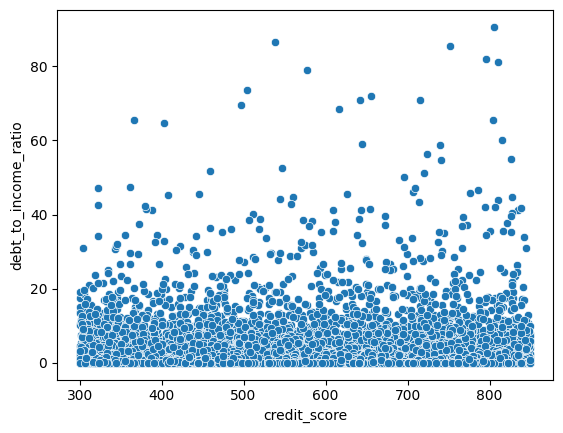

In [54]:
import seaborn as sns
sns.scatterplot(x='credit_score', y='debt_to_income_ratio', data=df)

In [55]:
# 31. Credit score trend over time
import datetime as dt
df['year'] = df['record_date'].dt.year # exctract year from record date and store it in new feature year

df.groupby('year')['credit_score'].mean()



,credit_score
year,
2021,570.946419
2022,574.011893
2023,575.463091
2024,577.592414
2025,576.360859


### G. Business-Level Insights

In [56]:
# 32. Financially stressed users
df[ (df['monthly_expenses_usd'] > df['monthly_income_usd']) & (df['credit_score'] < 600)]

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,credit_score,savings_to_income_ratio,region,record_date,income_bracket,spending_ratio,net_savings,emi_burden,credit_bracket,year


In [57]:
# 33. Financial wellness score (saving_to_income_ratio - debt_to_income_ratio)
df['financial_score'] = df['savings_to_income_ratio'] - df['debt_to_income_ratio']


In [58]:
# financial_score by region
df.groupby('region')['financial_score'].mean().sort_values(ascending=False)

,financial_score
region,
Africa,3.912161
Asia,3.872642
Other,3.862941
Europe,3.818738
North America,3.788408


In [59]:
# 34. Customer segmentation
def segment(row):
  if row['monthly_income_usd'] > 8000 and row['savings_to_income_ratio'] > 40.00 and row['debt_to_income_ratio'] < 30.00:
    return 'Welthy - Low Risk'
  elif row['monthly_income_usd']  < 4000 and row['debt_to_income_ratio'] > 60.00:
    return 'Low Income - Hight Risk'
  else:
    return 'Middle Segment'

df['customer_segment'] = df.apply(segment, axis=1)
df['customer_segment'].value_counts()


,count
customer_segment,
Middle Segment,32409
Low Income - Hight Risk,15


In [60]:
df


,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,region,record_date,income_bracket,spending_ratio,net_savings,emi_burden,credit_bracket,year,financial_score,customer_segment
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,...,Other,2024-01-09,lower-Mid,33.49,2349.10,0.00,Poor,2024,8.68,Middle Segment
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,...,North America,2022-02-13,lower-Mid,67.05,1163.74,140.26,Poor,2022,4.76,Middle Segment
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,...,Africa,2022-05-12,lower-Mid,35.86,1795.58,0.00,Excellent,2022,6.87,Middle Segment
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,...,Europe,2023-10-02,Upper-Mid,75.32,1454.76,83.57,Poor,2023,3.47,Middle Segment
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,...,Africa,2021-08-07,Upper-Mid,80.67,991.32,0.00,Poor,2021,7.50,Middle Segment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32419,U32420,30,Female,High School,Employed,Salesperson,4266.87,1510.82,273669.70,Yes,...,Europe,2024-02-25,lower-Mid,35.41,2756.05,145.95,Poor,2024,3.88,Middle Segment
32420,U32421,51,Female,Master,Employed,Student,5725.78,4965.02,17247.57,Yes,...,North America,2025-06-06,Upper-Mid,86.71,760.76,132.82,Poor,2025,-1.08,Middle Segment
32421,U32422,18,Female,Bachelor,Self-employed,Doctor,3282.38,2243.77,22081.21,No,...,Other,2025-07-20,lower-Mid,68.36,1038.61,0.00,Poor,2025,0.56,Middle Segment
32422,U32423,36,Other,High School,Self-employed,Accountant,5035.99,4054.32,524039.88,No,...,Asia,2022-06-07,Upper-Mid,80.51,981.67,0.00,Poor,2022,8.67,Middle Segment


In [61]:
df.to_csv('processed_financial_data.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  32424 non-null  object 
 1   age                      32424 non-null  int64  
 2   gender                   32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   monthly_income_usd       32424 non-null  float64
 7   monthly_expenses_usd     32424 non-null  float64
 8   savings_usd              32424 non-null  float64
 9   has_loan                 32424 non-null  object 
 10  loan_type                12995 non-null  object 
 11  loan_amount_usd          32424 non-null  float64
 12  loan_term_months         32424 non-null  int64  
 13  monthly_emi_usd          32424 non-null  float64
 14  loan_interest_rate_pct